Environment and Libraries

In [10]:
#Libraries
import cv2
import os
import glob
import warnings
import scipy.misc
import numpy as np
# # import nibabel as nib
import SimpleITK as sitk
from scipy import ndimage
import matplotlib.pyplot as plt
# os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'
from matplotlib.widgets import Slider

# import keras.api._v2.keras as keras
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import layers
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization, Activation, Conv2DTranspose, concatenate, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Model

from scipy.spatial.distance import directed_hausdorff

Preprocessing Data

In [11]:
from preprocessing import preprocessing
import numpy as np
print('-'*30)
print('Loading and preprocessing training data...')
print('-'*30)

# \\files.auckland.ac.nz\research\resmed202100086-tws ----> Address for raw data
total_slices_raw_data = 1015
DataOnlyAOI = True
scans_path = '/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/MRI Scans - Tairawhiti'
segmasks_fnames = ['8_R_tibia_12A', '9_R_tibia_11A', '10_R_tibia_13A']
scan_data_folders = ['12A_AutoBindWATER_450', '11A_AutoBindWATER_550', '13A_AutoBindWATER_450']

imgs_train, imgs_mask_train = preprocessing(scans_path, segmasks_fnames, scan_data_folders, total_slices_raw_data, DataOnlyAOI)

if (DataOnlyAOI == False):
    imgs_train = np.reshape(imgs_train, (len(scan_data_folders) * total_slices_raw_data, 512, 512))
    imgs_mask_train = np.reshape(imgs_mask_train, (len(segmasks_fnames) * total_slices_raw_data, 512, 512))
    imgs_train = np.expand_dims(imgs_train, axis=-1)
    imgs_mask_train = np.expand_dims(imgs_mask_train, axis=-1)

if (DataOnlyAOI == True):
    imgs_train = np.expand_dims(imgs_train, axis=-1)
    imgs_mask_train = np.expand_dims(imgs_mask_train, axis=-1)

print("\n")
print('Final Training Image Input Shape: ', imgs_train.shape)
print('Final Training Mask Input Shape: ', imgs_mask_train.shape)

print('-'*30)
print('Completed Preprocessing Stage!')
print('-'*30)

------------------------------
Loading and preprocessing training data...
------------------------------
Patient Scan Data Folders Included in Run:  ['12A_AutoBindWATER_450', '11A_AutoBindWATER_550', '13A_AutoBindWATER_450']


Segmentation Mask:  8_R_tibia_12A
Patient Scan Data:  12A_AutoBindWATER_450


ValueError: string is not a file: C:/Users/GGPC/OneDrive/Desktop/Part 4 Project/Part4Project/SegmentationMasks/8_R_tibia_12A.ply

Exporting out Labelled Datasets

In [7]:
# Exporting Training Scan and Mask Data
from writeout_dataset import WriteOutTextFile
from writeout_dataset import WriteOutImagePNGFiles

starting_slice = 1483
save_directory_data_txt = 'D:/P4P Model Data/txt/Data_Tibia'
save_directory_data_img = 'D:/P4P Model Data/img/Data'
save_directory_mask_txt = 'D:/P4P Model Data/txt/Masks_Tibia'
save_directory_mask_img = 'D:/P4P Model Data/img/Masks'

WriteOutTextFile(imgs_train[:, :, :, 0], save_directory_data_txt, starting_slice)   
# WriteOutImagePNGFiles(imgs_train, save_directory_data_img)

WriteOutTextFile(imgs_mask_train[:, :, :, 0], save_directory_mask_txt, starting_slice)   
# WriteOutImagePNGFiles(imgs_mask_train, save_directory_mask_img)

Saved D:/P4P Model Data/txt/Data_Tibia/data_1483.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1484.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1485.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1486.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1487.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1488.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1489.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1490.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1491.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1492.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1493.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1494.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1495.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1496.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1497.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1498.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1499.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_1500.txt
Saved D:/P4P Model Data/txt/Data_Tibia/data_15

Data Validation (Visual Sanity Check)

TypeError: Invalid shape (512,) for image data

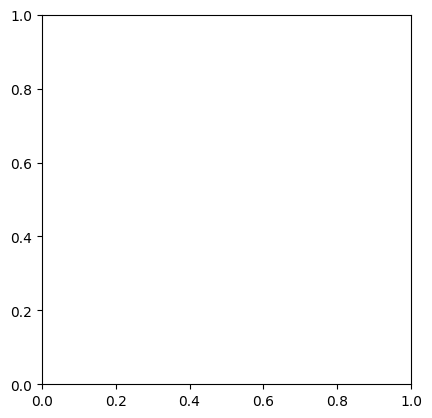

In [28]:
# Visualiser Tool Scan
# temp = np.squeeze(imgs_train)
fig, ax = plt.subplots()
current_slice = 100
img = ax.imshow(temp[current_slice], cmap='gray')
ax.axis('off')

# Configure the slider
ax_slider = plt.axes([0.2, 0.02, 0.6, 0.03])
slider = Slider(ax_slider, 'Slice', 0, temp.shape[0] - 1, valinit=current_slice, valstep=1)

def update_slice(val):
    current_slice = int(slider.val)
    img.set_data(temp[current_slice])
    fig.canvas.draw_idle()

slider.on_changed(update_slice)

plt.show()

# Visualiser Tool Mask
# temp = np.squeeze(imgs_mask_train)
fig, ax = plt.subplots()
current_slice = 100
img = ax.imshow(temp[current_slice], cmap='gray')
ax.axis('off')

# Configure the slider
ax_slider = plt.axes([0.2, 0.02, 0.6, 0.03])
slider = Slider(ax_slider, 'Slice', 0, temp.shape[0] - 1, valinit=current_slice, valstep=1)

def update_slice(val):
    current_slice = int(slider.val)
    img.set_data(temp[current_slice])
    fig.canvas.draw_idle()

slider.on_changed(update_slice)

plt.show()

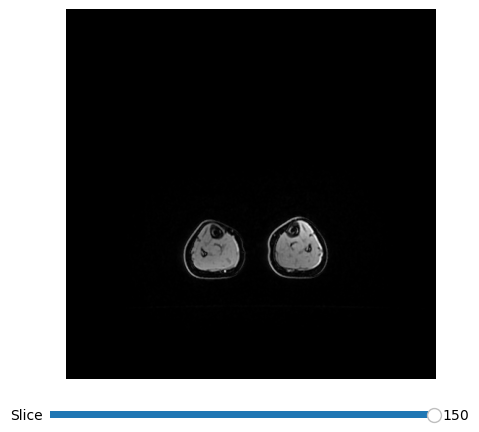

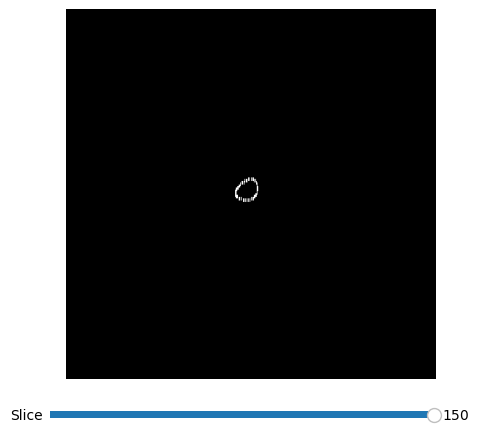

In [22]:
temp = np.loadtxt("D:/P4P Model Data/txt/Data_Tibia/data_100.txt", delimiter=',')
# Visualiser Tool Data Files

fig, ax = plt.subplots()
current_slice = 150
img = ax.imshow(temp, cmap='gray')
ax.axis('off')

# Configure the slider
ax_slider = plt.axes([0.2, 0.02, 0.6, 0.03])
slider = Slider(ax_slider, 'Slice', 0, current_slice, valinit=current_slice, valstep=1)

def update_slice(val):
    current_slice = int(slider.val)
    img.set_data(temp[current_slice])
    fig.canvas.draw_idle()

slider.on_changed(update_slice)

plt.show()

temp = np.loadtxt("D:/P4P Model Data/txt/Masks_Tibia/data_100.txt", delimiter=',')
# Visualiser Tool Data Files

fig, ax = plt.subplots()
current_slice = 150
img = ax.imshow(temp, cmap='gray')
ax.axis('off')

# Configure the slider
ax_slider = plt.axes([0.2, 0.02, 0.6, 0.03])
slider = Slider(ax_slider, 'Slice', 0, current_slice, valinit=current_slice, valstep=1)

def update_slice(val):
    current_slice = int(slider.val)
    img.set_data(temp[current_slice])
    fig.canvas.draw_idle()

slider.on_changed(update_slice)

plt.show()

2DUNet Model

In [24]:
def get_unet(scale = 0.5, dropout_rate = 0.4):
    inputs = keras.Input((512,512,1))

    # Encoding Path of the UNet (32-64-128-256-512)
    conv1   = Conv2D(32*scale, (3, 3), padding="same", activation='relu')(inputs)
    # conv1 = Conv2D(32*scale, 3, activation='relu', padding='same')(inputs)
    drop1   = Dropout(rate=dropout_rate)(conv1, training=True)
    max1    = MaxPooling2D((2, 2))(drop1)

    conv2   = Conv2D(64*scale, (3, 3), padding="same", activation='relu')(max1)
    drop2   = Dropout(rate=dropout_rate)(conv2, training=True)
    max2    = MaxPooling2D((2, 2))(drop2)

    conv3   = Conv2D(128*scale, (3, 3), padding="same", activation='relu')(max2)
    drop3   = Dropout(rate=dropout_rate)(conv3, training=True)
    max3    = MaxPooling2D((2, 2))(drop3)

    conv4   = Conv2D(256*scale, (3, 3), padding="same", activation='relu')(max3)
    drop4   = Dropout(rate=dropout_rate)(conv4, training=True)
    max4    = MaxPooling2D((2, 2))(drop4)

    lat     = Conv2D(512*scale, (3, 3), padding="same", activation='relu')(max4)
    drop5   = Dropout(rate=dropout_rate)(lat, training=True)

    # Decoding Path of the UNet
    up1     = UpSampling2D((2, 2))(drop5)
    concat1 = concatenate([conv4, up1], axis=-1)
    conv5   = Conv2D(256*scale, (3, 3), padding="same", activation='relu')(concat1)
    drop6   = Dropout(rate=dropout_rate)(conv5, training=True)
    
    up2     = UpSampling2D((2, 2))(drop6)
    concat2 = concatenate([conv3, up2], axis=-1)
    conv6   = Conv2D(128*scale, (3, 3), padding="same", activation='relu')(concat2)
    drop7   = Dropout(rate=dropout_rate)(conv6, training=True)
    
    up3     = UpSampling2D((2, 2))(drop7)
    concat3 = concatenate([conv2, up3], axis=-1)
    conv7   = Conv2D(64*scale, (3, 3), padding="same", activation='relu')(concat3)
    drop8   = Dropout(rate=dropout_rate)(conv7, training=True)

    up4     = UpSampling2D((2, 2))(drop8)
    concat4 = concatenate([conv1, up4], axis=-1)
    conv8   = Conv2D(32*scale, (3, 3), padding="same", activation='relu')(concat4)
    drop9   = Dropout(rate=dropout_rate)(conv8, training=True)
    
    outputs = Conv2D(1, (1, 1), activation="softmax")(drop9)

    model   = Model(inputs, outputs)

    return model

In [4]:
from writeout_dataset import ReadInDatasets
imgs_train = ReadInDatasets('D:/P4P Model Data/txt/Data_Tibia')
imgs_mask_train = ReadInDatasets('D:/P4P Model Data/txt/Masks_Tibia')
# imgs_mask_train = np.expand_dims(imgs_mask_train, axis=-1)
# imgs_train = np.expand_dims(imgs_train, axis=-1)

In [11]:
from writeout_dataset import ReadInDatasets
imgs_train = ReadInDatasets('D:/P4P Model Data/txt/Data_Tibia')
imgs_mask_train = ReadInDatasets('D:/P4P Model Data/txt/Masks_Tibia')
imgs_mask_train = np.expand_dims(imgs_mask_train, axis=-1)
imgs_train = np.expand_dims(imgs_train, axis=-1)

# Image Parameters
IMAGE_WDITH = 512
IMAGE_HEIGHT = 512
IMAGE_CHANNELS = 1

# Training, Testing and Validation Parameters
# TRAINING_VOLUMES = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# VALIDATION_VOLUMES = [9]

# Hyperparameters
N_CLASSES = 2
N_INPUT_CHANNELS = 1
# PATCH_SIZE = (32, 32)
# PATCH_STRIDE = (32, 32)

# # Data Preparation Parameters
# CONTENT_THRESHOLD = 0.3 # To Get Rid of Useless Information in the Image

# Training Parameters
N_EPOCHS = 200
BATCH_SIZE = 32
PATIENCE = 3
MODEL_FNAME_PATTERN = 'model.h5'
OPTIMISER = 'Adam'
# LOSS = 'categorical_crossentropy'
LOSS = 'binary_crossentropy'
dropout_rate = 0.40


print('-'*30)
print('Loading and preprocessing train data...')
print('-'*30)

images_train, images_val, labels_train, labels_val = train_test_split(imgs_train, imgs_mask_train, test_size=0.2, random_state=0)
print('Training Image Input Shape: ', images_train.shape)
print('Training Mask Input Shape: ', labels_train.shape)
print('Validation Image Input Shape: ', images_val.shape)
print('Validation Mask Input Shape: ', labels_val.shape)


print('-'*30)
print('Creating and compiling model...')
print('-'*30)

# my_callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=PATIENCE), # early stopping
#     tf.keras.callbacks.ModelCheckpoint(filepath=MODEL_FNAME_PATTERN, save_best_only=True) # save the best based on validation
# ]

# unet = get_unet()
# unet.compile(optimizer=OPTIMISER, loss=LOSS)
# unet.fit(
#     x=images_train, 
#     y=labels_train,
#     validation_data=(images_val, labels_val),
#     batch_size=BATCH_SIZE,
#     epochs=N_EPOCHS,
#     callbacks=my_callbacks,
#     verbose=1)

# unet.summary()

# unet = get_unet()
# unet.compile(optimizer=OPTIMISER, loss=LOSS)
# unet.load_weights('model.h5')

# testing_scans_processed = images_train[0]
# testing_masks_processed = labels_train[0]
# testing_scans_processed = np.reshape(testing_scans_processed, (1, 512, 512, 1))
# testing_masks_processed = np.reshape(testing_masks_processed, (1, 512, 512, 1))

# # testing_labels_processed = tf.keras.utils.to_categorical(testing_masks_processed, num_classes=2, dtype='float32')

# print('Testing Image Input Shape: ',testing_scans_processed.shape)
# print('Testing Mask Input Shape:',testing_masks_processed.shape)

# prediction = unet.predict(x=testing_scans_processed)
# # prediction = np.argmax(prediction, axis=3)
# # prediction = np.reshape(prediction[0], (512, 512))

# # plt.imshow(prediction, cmap='gray')
# # plt.show()

------------------------------
Loading and preprocessing train data...
------------------------------
Training Image Input Shape:  (1707, 512, 512)
Training Mask Input Shape:  (1707, 512, 512)
Validation Image Input Shape:  (427, 512, 512)
Validation Mask Input Shape:  (427, 512, 512)
------------------------------
Creating and compiling model...
------------------------------


In [6]:
# Flatten the array to 2D
flattened_array = imgs_train.reshape((imgs_train.shape[0], -1))

# Write the array to the text file
# np.savetxt('D:/P4P Model Data/txt/DataCompiled', flattened_array)

In [7]:
flattened_array.shape

(2134, 262144)

In [88]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred, axis=(1, 2, 3))
    union = np.sum(y_true, axis=(1, 2, 3)) + np.sum(y_pred, axis=(1, 2, 3))
    dice = (2.0 * intersection) / (union + 1e-7)  # Adding a small epsilon to avoid division by zero
    return dice

def assd(y_true, y_pred, spacing):
    surface_distances = surface_distance(y_true, y_pred, spacing)
    avg_surface_distance = np.mean(surface_distances)
    return avg_surface_distance

def surface_distance(y_true, y_pred, spacing):
    true_surface = find_surface_points(y_true, spacing)
    pred_surface = find_surface_points(y_pred, spacing)
    
    if true_surface.shape[0] == 0 or pred_surface.shape[0] == 0:
        raise ValueError("One or both surface point arrays are empty.")
    
    try:
        surface_distances_true_to_pred = directed_hausdorff(true_surface, pred_surface)[0]
        surface_distances_pred_to_true = directed_hausdorff(pred_surface, true_surface)[0]
        surface_distances = np.concatenate([surface_distances_true_to_pred, surface_distances_pred_to_true])
    except ValueError as e:
        print("Error occurred during Hausdorff distance calculation:", e)
        raise
    
    return surface_distances

def find_surface_points(mask, spacing):
    mask_padded = np.pad(mask, 1, mode='constant')
    mask_padded_diff = np.diff(mask_padded.astype(int), axis=0)
    
    surface_points = []
    for z in range(mask_padded_diff.shape[0]):
        surface_indices = np.where(mask_padded_diff[z] != 0)
        if len(surface_indices[0]) > 0:
            surface_points.extend(list(zip(surface_indices[0], surface_indices[1])))
    
    surface_points = np.array(surface_points)
    surface_points_phys = surface_points * spacing
    
    return surface_points_phys

def volume_error(y_true, y_pred):
    true_volume = np.sum(y_true)
    pred_volume = np.sum(y_pred)
    volume_error = np.abs(true_volume - pred_volume) / true_volume
    return volume_error


DSC = dice_coefficient(testing_masks_processed, prediction)
print('Dice Similarity Coefficient (DSC) Metric Value: ', DSC)
print('\n')

# VError = volume_error(testing_masks_processed, prediction)
# print('Volume Error (VError) Metric Value: ', VError)
# print('\n')

# spacing = 1
# ASSD = assd(testing_masks_processed, prediction, spacing)
# print('Average Symmetric Surface Distance (ASSD) Metric Value: ', ASSD)
# print('\n')

Dice Similarity Coefficient (DSC) Metric Value:  [4.0989216e-06]




In [ ]:
# from keras.models import Model
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization, Activation, Conv2DTranspose, concatenate
# from keras.layers.core import Dropout
# import tensorflow as tf
# # from tensorflow.keras.models import Model
# from keras.layers import *
# from keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# import numpy as np

# # Define U-Net model
# def unet_model(input_shape):
#     inputs = Input(input_shape)
    
#     # Encoder
#     conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
#     conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
#     conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
#     conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
#     conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
#     conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
#     conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
#     conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
#     drop4 = Dropout(0.5)(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    
#     # Bottleneck
#     conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
#     conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
#     drop5 = Dropout(0.5)(conv5)
    
#     # Decoder
#     up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
#     merge6 = concatenate([drop4, up6], axis=3)
#     conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
#     conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)
    
#     up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
#     merge7 = concatenate([conv3, up7], axis=3)
#     conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
#     conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)
    
#     up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
#     merge8 = concatenate([conv2, up8], axis=3)
#     conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
#     conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)
    
#     up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
#     merge9 = concatenate([conv1, up9], axis=3)
#     conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
#     conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    
#     outputs = Conv2D(1, 1, activation='sigmoid')(conv9)
    
#     model = Model(inputs=inputs, outputs=outputs)
    
#     return model

# # Dice Coefficient Loss Function 
# def dice_coefficient(y_true, y_pred):
#     smooth = 1e-5
#     intersection = tf.reduce_sum(y_true * y_pred)
#     union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
#     dice = (2.0 * intersection + smooth) / (union + smooth)
#     return 1.0 - dice


# # Reformat image data structure
# training_scans_reshaped = np.concatenate(preprocessed_images, axis=0)
# training_scans = training_scans_reshaped.reshape((-1, 512, 512, 1))
# train_mask_tibia_labels_reshaped = np.concatenate(preprocessed_masks, axis=0)
# train_mask_tibia_labels = train_mask_tibia_labels_reshaped.reshape((-1, 512, 512, 1))

# # Split the data into training and validation sets\
# images_train, images_val, labels_train, labels_val = train_test_split(training_scans, train_mask_tibia_labels, test_size=0.2, random_state=0)
# unseen_scan_model = np.array(training_scans[2][100])
# images_train = images_train.astype('float32') / 255.0
# images_val = images_val.astype('float32') / 255.0

# print(images_train.shape)
# print(labels_train.shape)
# print(images_train.dtype)
# print(labels_train.dtype)
# print(images_val.shape)
# print(labels_val.shape)
# print(images_val.dtype)
# print(labels_val.dtype)
# print(unseen_scan_model.shape)

# # Expand dimensions for the channel (grayscale) dimension
# # images_train = np.expand_dims(images_train, axis=-1)
# # images_val = np.expand_dims(images_val, axis=-1)
# # labels_train = np.expand_dims(labels_train, axis=-1)
# # labels_val = np.expand_dims(labels_val, axis=-1)

# # Create an instance of the U-Net model
# input_shape = (512, 512, 1)  # For grayscale images

# # Create an instance of the U-Net model
# model = unet_model(input_shape)

# # Compile the model
# # Binary Cross Entropy Loss Function
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# # Dice Coefficient Loss Function
# # model.compile(optimizer=Adam(), loss=dice_coefficient, metrics=['accuracy'])

# # Train the model
# # Hyperparameter tuning -> batch_size
# model.fit(x=images_train, y=labels_train, batch_size=32, epochs=1, validation_data=(images_val, labels_val))
# # Evaluate the model
# loss, accuracy = model.evaluate(x=images_val, y=labels_val)

# # Perform inference on new, unseen MRI scans
# predictions = model.predict(unseen_scan_model)